#Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable base on some other combination of variables, even shorter... predicting a number.

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

##Creating data to view and fit

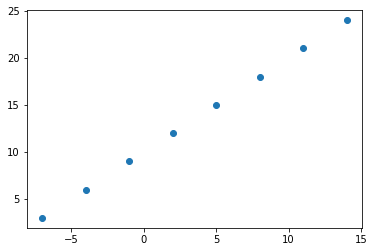

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction preblem
housing_info = tf.constant(["bedroom", "bathroom", "garage"])
housing_price = tf.constant([939700]) 
housing_info, housing_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)

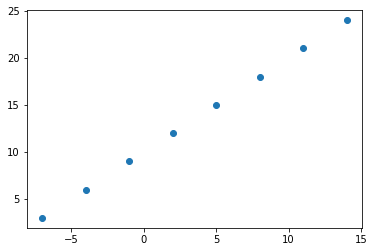

In [ ]:
plt.scatter(X, y);

##Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learing model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3.**Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

Epoch 1/5
1/1 [==============================] - 1s 811ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 195ms/step


array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
 # Let's see if our model's prediction has improved
 model.predict([17.0])

1/1 [==============================] - 0s 321ms/step


array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mean_absolute_error",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line

In [ ]:
# Let's see how our model is doing
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[27.159164]], dtype=float32)

###Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth.

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

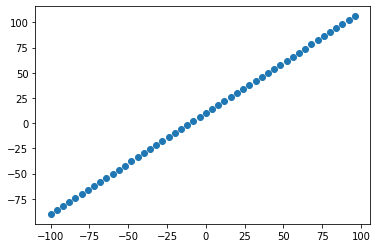

In [ ]:
# Visualize the data
plt.scatter(X, y);

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data,
which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

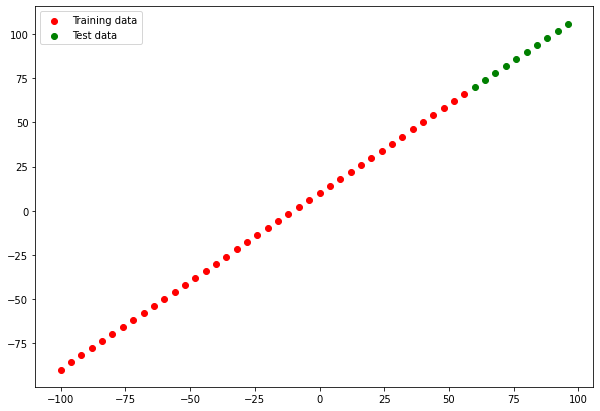

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in red
plt.scatter(X_train, y_train, c="r", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend()
plt.show()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) # <- updated line

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               200       
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**).

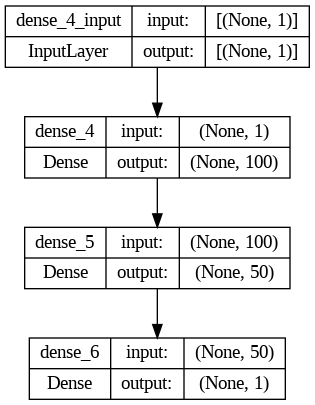

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them againt the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's prediction).

In [ ]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 105ms/step


array([[ 71.904915],
       [ 76.68656 ],
       [ 81.46821 ],
       [ 86.249855],
       [ 91.0315  ],
       [ 95.81315 ],
       [100.594795],
       [105.37643 ],
       [110.15807 ],
       [114.939735]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
  plt.show()

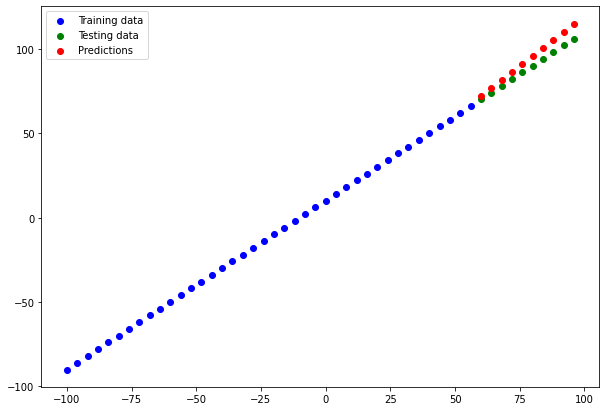

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 219ms/step - loss: 5.4223 - mae: 5.4223


[5.422321319580078, 5.422321319580078]

In [ ]:
# Calculate the mean absolute error
mean_absolute_error = tf.reduce_mean(tf.abs(y_test - y_pred), axis=-1) 
mean_absolute_error

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([17, 13, 11, 10, 10, 11, 13, 17, 22, 26], dtype=int32)>

In [ ]:
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.476068, 13.188063, 11.012716, 10.      , 10.206301, 11.525259,
       13.956877, 17.50114 , 22.158073, 26.939734], dtype=float32)>

In [ ]:
# Calculate the mean squared error
mean_squared_error = tf.reduce_mean(tf.square(y_test - y_pred), axis=-1)
mean_squared_error

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([421, 276, 181, 136, 141, 181, 276, 421, 616, 808], dtype=int32)>

In [ ]:
tf.keras.losses.MSE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([391.05176, 259.9939 , 174.6643 , 135.06302, 141.19   , 193.0453 ,
       290.62888, 433.94025, 622.9802 , 857.7493 ], dtype=float32)>

In [ ]:
# Squeezing the dimensions of y_pred
y_pred_squeezed = tf.squeeze(y_pred)
y_pred_squeezed

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.904915,  76.68656 ,  81.46821 ,  86.249855,  91.0315  ,
        95.81315 , 100.594795, 105.37643 , 110.15807 , 114.939735],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test, y_pred_squeezed)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.4223223>

In [ ]:
# Calcualte the mean squared error
mse = tf.keras.losses.MSE(y_test, y_pred_squeezed)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=34.442078>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_test, y_pred):
  return tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

def mse(y_test, y_pred):
  return tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

In [ ]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=5.4223223>

In [ ]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=34.442078>

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

The machine learning practicioner's moto:
**Experiment, experiment, experiment**

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. **Make your model larger** (using more complex model) - this might come in the form of more hidden layers or more hidden units (neurons) in each layer.
3. **Train for longer** - give your model more of a chance to find patterns in the data.

Let's do 3 modelling expreriments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model_1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
], name="model_1")

# Compile model_1
model_1.compile(loss="mae",
                optimizer="sgd",
                metrics=["mae"])

# Fit model_1
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 13ms/step - 

1/1 [==============================] - 0s 104ms/step


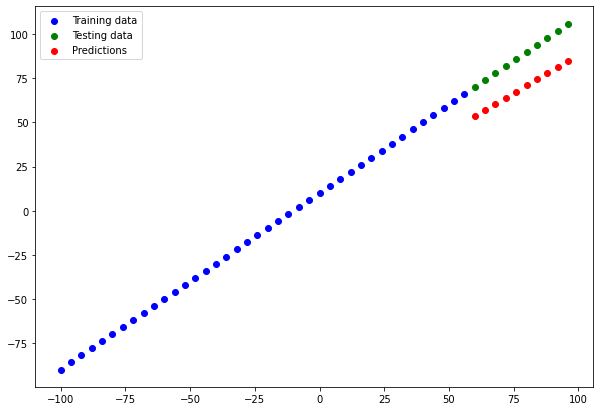

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model_2
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="model_2")

# Compile model_2
model_2.compile(loss="mae",
                optimizer="sgd",
                metrics=["mae"])

# Fit model_2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

1/1 [==============================] - 0s 73ms/step


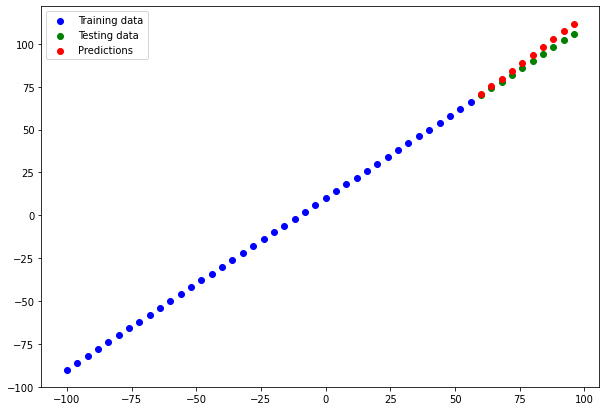

In [ ]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model_3
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
], name="model_3")

# Compile model_3
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# Fit model_3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

1/1 [==============================] - 0s 182ms/step


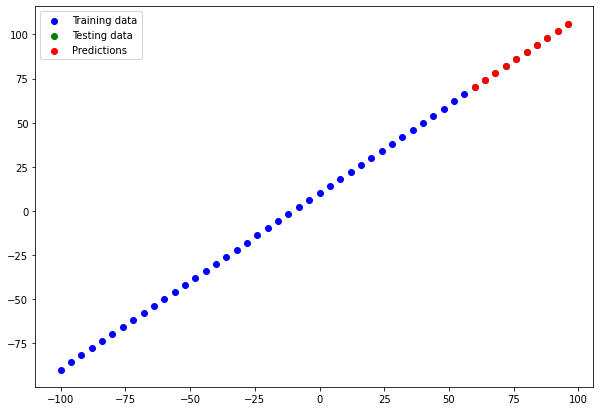

In [ ]:
# Make and plot predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.14578477>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.021736588>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
          
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])    
all_results     

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,0.145785,0.021737


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

As you build more models, you'll want to look into using:

* TensorBoard
* Weights & Biases

## Saving our models

Saving our model allows us to use them outside of Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_3.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_3.save("best_model_HDF5_format.h5")

## Loading our models

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_model = tf.keras.models.load_model("/content/best_model_SavedModel_format")

In [ ]:
# Compare model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_model_preds = loaded_SavedModel_model.predict(X_test)           
model_3_preds == loaded_SavedModel_model_preds    

1/1 [==============================] - 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")

1/1 [==============================] - 0s 144ms/step


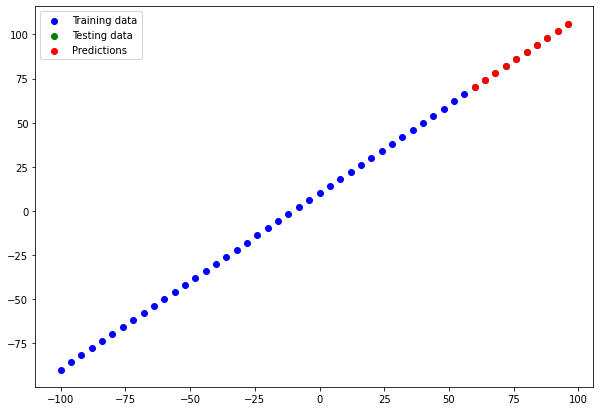

In [ ]:
y_pred_new = loaded_h5_model.predict(X_test)
plot_predictions(predictions=y_pred_new)

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To **one-hot encode** dataframe in pandas use `pd.get_dummies()`.

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a neural network (sort of like model_3)
tf.random.set_seed(42)

# Create a model
insurance_model = keras.models.Sequential([
    keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=500)

In [ ]:
# Check the results of the insurace model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3997.5383 - mae: 3647.9126


[3997.538330078125, 3647.91259765625]

Right now it looks like our model isn't performing too well... let's try and improve it!

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_2 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss="mae",
                          optimizer=keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=200)

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1756.5039 - mae: 1756.5039


[1756.50390625, 1756.50390625]

Text(0.5, 0, 'epochs')

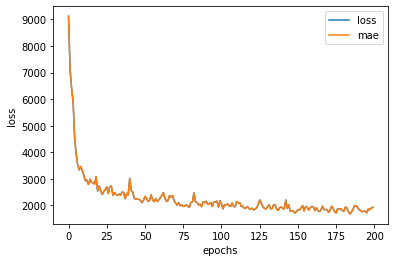

In [ ]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In [ ]:
# Feature scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_3 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])


# Compile the model
insurance_model_3.compile(loss="mae",
                          optimizer=keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["mae"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
 restore_best_weights=True)

# Fit the model
history = insurance_model_3.fit(X_train_scaled, 
                                y_train, 
                                epochs=500,
                                callbacks=[early_stopping_cb])

In [ ]:
insurance_model_3.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1399.9159 - mae: 1399.9159


[1399.9158935546875, 1399.9158935546875]

Text(0.5, 0, 'epochs')

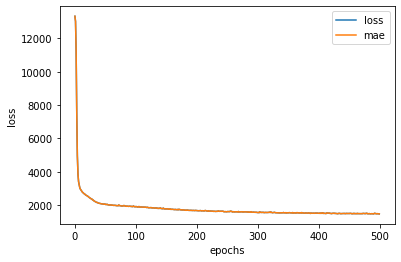

In [ ]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [ ]:
# Normalisation
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column_transformer to our training data
ct.fit(X_train)

# Tranforming the test & the testing data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss="mae",
                         optimizer=keras.optimizers.Adam(),
                         metrics=["mae"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
 restore_best_weights=True)

# Fit the model
insurance_model_4.fit(X_train_normal,
                      y_train,
                      epochs=500,
                      callbacks=[early_stopping_cb])

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1728.4467 - mae: 1728.4467


[1728.4466552734375, 1728.4466552734375]

Text(0.5, 0, 'epochs')

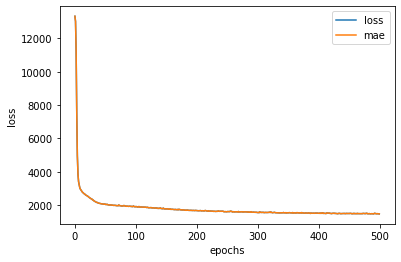

In [ ]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")